# 카드소비패턴 시각화

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_upjong_cd = pd.read_csv('카드소비 업종코드.csv', encoding='cp949')
df_sex_and_age = pd.read_csv('블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')
df_time_and_micropayment = pd.read_csv('블록별 시간대별소액결제건수 카드소비패턴.csv', encoding='cp949')

df_upjong_cd['업종코드(UPJONG_CD)'] = df_upjong_cd['업종코드(UPJONG_CD)'].str.upper()

df_sex_and_age = pd.merge(df_sex_and_age, df_upjong_cd, 
         left_on="서울시민업종코드(UPJONG_CD)", right_on="업종코드(UPJONG_CD)")
df_time_and_micropayment = pd.merge(df_time_and_micropayment, df_upjong_cd, 
         left_on="서울시민업종코드(UPJONG_CD)", right_on="업종코드(UPJONG_CD)")

df_sex_and_age.drop(['서울시민업종코드(UPJONG_CD)', '고객주소블록코드(BLOCK_CD)'], axis=1, inplace=True)
df_time_and_micropayment.drop(['서울시민업종코드(UPJONG_CD)', '고객주소블록코드(BLOCK_CD)'], axis=1, inplace=True)

df_sex_and_age.sort_values('연령대별(AGE)', inplace=True)

In [2]:
df_upjong_cd

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,SS001,요식/유흥,한식,한식
1,SS002,요식/유흥,일식/중식/양식,일식
2,SS003,요식/유흥,일식/중식/양식,양식
3,SS004,요식/유흥,일식/중식/양식,중식
4,SS005,요식/유흥,제과/커피/패스트푸드,제과점
...,...,...,...,...
70,SS084,스포츠/문화/레저,스포츠/문화/레저,스키
71,SS090,교육/학원,학원,입시보습학원
72,SS091,교육/학원,학원,외국어학원
73,SS092,교육/학원,학원,예체능학원


In [3]:
df_sex_and_age

,기준년월(YM),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
183,202011,F,10대,34204,126,SS054,의료,병원,종합병원
184,201605,M,10대,144361,10,SS054,의료,병원,종합병원
259,201708,F,10대,11102382,25,SS004,요식/유흥,일식/중식/양식,중식
445,202104,F,10대,169511,86,SS053,교육/학원,교육용품,교육용품
455,202006,F,10대,8722976,50,SS067,주유,주유,LPG
...,...,...,...,...,...,...,...,...,...
382,202003,F,70대이상,140840,20,SS040,여행/교통,교통,교통
296,201908,M,70대이상,230877,5,SS064,자동차,자동차서비스/용품,자동차서비스
306,201702,M,70대이상,952682,10,SS034,스포츠/문화/레저,스포츠/문화/레저용품,화원
393,201810,F,70대이상,1021090,5,SS055,의료,병원,일반병원


In [5]:
df_time_and_micropayment

,기준년월(YM),시간대구간(TIME),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM),업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,202006,6,257,25,SS017,유통,기타유통,기타유통
1,202012,3,10,0,SS017,유통,기타유통,기타유통
2,201903,6,20,55,SS017,유통,기타유통,기타유통
3,202009,1,106,5,SS017,유통,기타유통,기타유통
4,201601,6,5,5,SS017,유통,기타유통,기타유통
...,...,...,...,...,...,...,...,...
495,201908,3,10,0,SS036,여행/교통,숙박,모텔/여관/기타숙박
496,201603,4,5,0,SS090,교육/학원,학원,입시보습학원
497,202012,5,10,0,SS014,유통,할인점/슈퍼마켓,슈퍼마켓
498,202105,3,5,0,SS014,유통,할인점/슈퍼마켓,슈퍼마켓


## 1. 10대의 카드이용건수가 소액결제건수에 영향을 미칠 것이다.

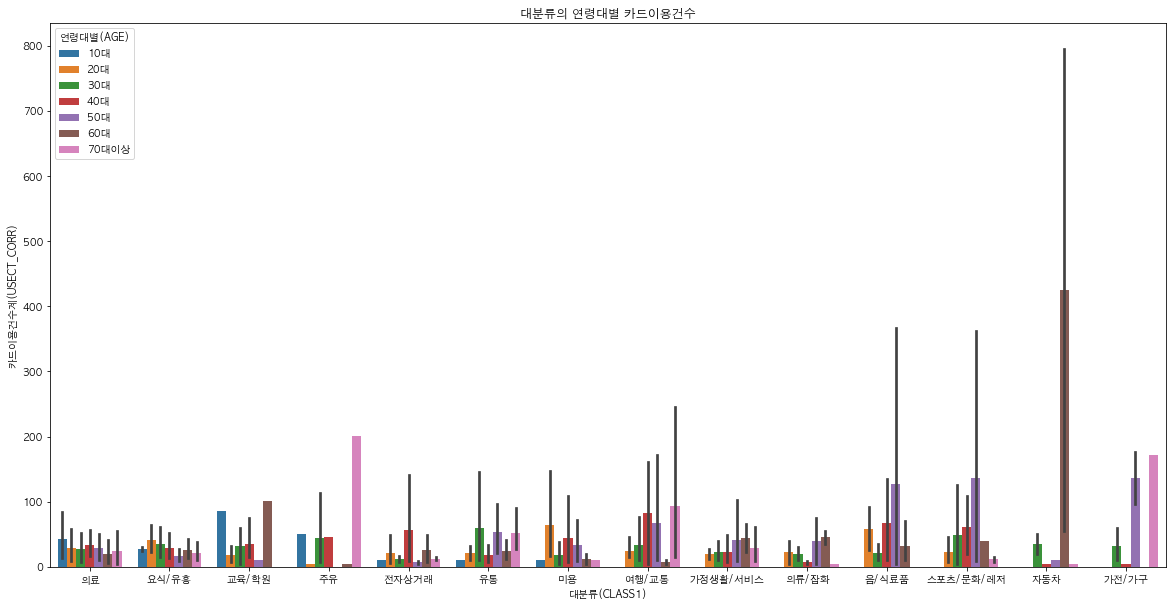

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
fig = plt.figure(figsize=(20, 10))
plt.title('대분류의 연령대별 카드이용건수')
sns.barplot(x='대분류(CLASS1)', y='카드이용건수계(USECT_CORR)', hue='연령대별(AGE)', data=df_sex_and_age)
plt.show()

### 10대가 이용하는 업종의 카드이용건수와 소액결제건수 비교

In [63]:
df_sex_and_age10 = df_sex_and_age[df_sex_and_age['연령대별(AGE)'] == '10대']
df_age10_usect = df_sex_and_age10.groupby('소분류(CLASS3)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False)
df_age10_usect.name = 'AGE10_USECT'
df_age10_usect

소분류(CLASS3)
종합병원    136
교육용품     86
LPG      50
치과병원     35
기타요식     30
한의원      30
중식       25
일반병원     10
편의점      10
홈쇼핑      10
화장품      10
Name: AGE10_USECT, dtype: int64

In [40]:
df_teenage_upjong_micropayment = df_time_and_micropayment[df_time_and_micropayment['소분류(CLASS3)'].isin(df_age10_usect.index)].groupby('소분류(CLASS3)')['소액결제건수(MICRO_PYM)'].sum().sort_values(ascending=False)
df_teenage_upjong_micropayment.name='MICRO_PYM'
df_teenage_upjong_micropayment

소분류(CLASS3)
교육용품    728
편의점     677
중식      653
종합병원    246
기타요식    190
일반병원     95
치과병원     95
홈쇼핑      90
화장품      65
한의원      55
LPG      40
Name: MICRO_PYM, dtype: int64

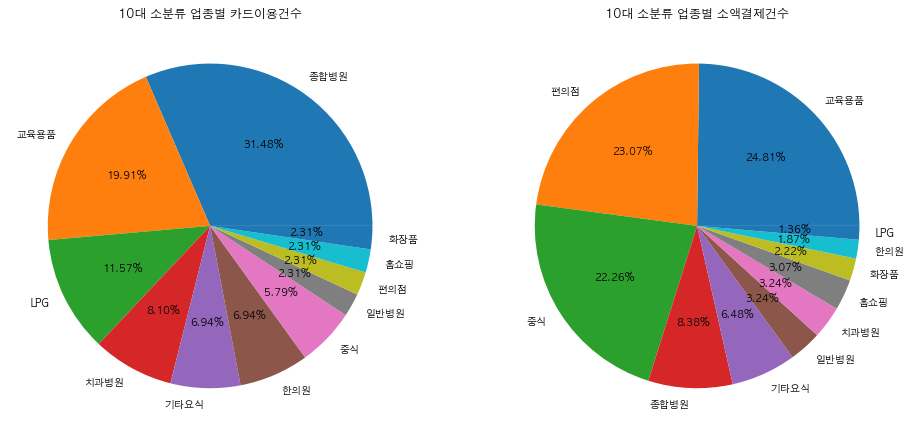

In [22]:
fig = plt.figure(figsize=(16, 8), facecolor='white')
ax1 = fig.add_subplot(1, 2, 1)
plt.title('10대 소분류 업종별 카드이용건수')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('10대 소분류 업종별 소액결제건수')

ax1.pie(df_age10_usect, labels=df_age10_usect.index, autopct=lambda p : '{:.2f}%'.format(p))
ax2.pie(df_teenage_upjong_micropayment, labels=df_teenage_upjong_micropayment.index, autopct=lambda p : '{:.2f}%'.format(p))
plt.show()


둘다 많은 업종 : 교육용품, 기타요식  
둘다 적은 업종 : 일반병원, 홈쇼핑, 화장품  

**10대 카드이용건수는 많으나 소액결제건수가 적은 업종** : 종합병원, LPG, 치과병원, 한의원  
**10대 카드이용건수는 적으나 소액결제건수가 많은 업종** : 중식, 편의점

### 다른 연령대의 카드이용건수 때문 ?

<AxesSubplot:title={'center':'소분류의 연령대별 카드이용건수'}, xlabel='소분류(CLASS3)', ylabel='카드이용건수계(USECT_CORR)'>

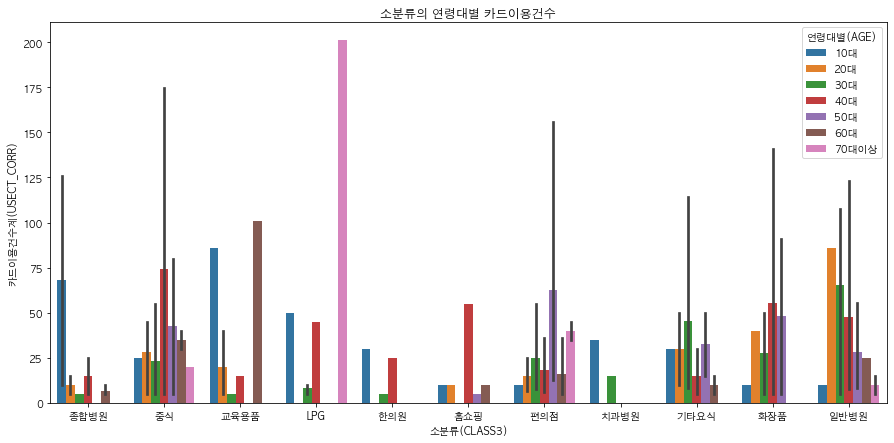

In [23]:
plt.figure(figsize=(15, 7))
plt.title('소분류의 연령대별 카드이용건수')
df_teenage_upjong_usect = df_sex_and_age[df_sex_and_age['소분류(CLASS3)'].isin(df_age10_usect.index)]
sns.barplot(x='소분류(CLASS3)', y='카드이용건수계(USECT_CORR)', hue='연령대별(AGE)', data=df_teenage_upjong_usect)

### 10대 카드이용건수는 많으나 소액결제건수가 적은 업종

종합병원, 치과병원, 한의원은 10대가 전체 고객의 절반 이상을 차지하고 있음.  
반면 교육용품, 기타요식은 다른 연령대의 카드이용건수가 많음. (=소액결제건수가 많을 가능성도 높음)  
종합병원, 치과병원, 한의원은 다른 연령대의 소액결제건수가 적어 총 소액결제건수도 적음.  

10대가 많이 이용하는 업종이라도, 다른 연령대의 카드이용이 적으면 소액결제건수도 적음.

### 10대 카드이용건수는 적으나 소액결제건수가 많은 업종

10대 카드이용건수가 적은 업종은 모두 전체 고객 중 10대가 차지하는 비율도 낮음.  
그러나 중식, 편의점은 소액결제건수가 많고 일반병원, 홈쇼핑, 화장품은 소액결제건수가 적음.  
일반적으로 중식, 편의점은 가격이 낮은 음식이나 제품이 많아 연령대와 관계없이 소액결제가 많이 이루어진 것으로 보임.

10대의 이용이 적은 업종은, 업종의 특성이 소액결제건수에 영향을 줌.

### 소결론

10대의 카드이용건수가 전체 소액결제건수에 절대적인 영향을 주진 않음.  
다른 연령대의 카드소비와 업종의 특성에 따라 소액결제건수가 영향을 받음.
- 전체 / 가장 많은 연령대의 카드이용건수
- 총 카드이용건수 중 10대의 비율
- 건수당 평균 카드이용금액

In [145]:
df_teenage_upjong_usect.groupby('연령대별(AGE)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False).head(5)

연령대별(AGE)
40대    1023
30대     843
50대     769
20대     496
10대     432
Name: 카드이용건수계(USECT_CORR), dtype: int64

In [35]:
weighted_avg_func = lambda g : np.average(g['카드이용금액계(AMT_CORR)'], weights=g['카드이용건수계(USECT_CORR)'])

In [153]:
df_teenage_upjong = pd.merge(df_age10_usect, df_teenage_upjong_micropayment, on='소분류(CLASS3)')
df_teenage_upjong['TOTAL_USECT'] = df_teenage_upjong_usect.groupby('소분류(CLASS3)')['카드이용건수계(USECT_CORR)'].sum()
df_teenage_upjong['AGE10_USECT_RATE'] = round(df_teenage_upjong['AGE10_USECT'] / df_teenage_upjong['TOTAL_USECT'], 3)
df_teenage_upjong['AGE40_USECT'] = df_teenage_upjong_usect[df_teenage_upjong_usect['연령대별(AGE)'] == '40대'].groupby('소분류(CLASS3)')['카드이용건수계(USECT_CORR)'].sum()
df_teenage_upjong['AGE40_USECT_RATE'] = round(df_teenage_upjong['AGE40_USECT'] / df_teenage_upjong['TOTAL_USECT'], 3)
df_teenage_upjong['AVE_AMT'] = df_teenage_upjong_usect.groupby('소분류(CLASS3)').apply(weighted_avg_func)
df_teenage_upjong.index.name = 'class3'
df_teenage_upjong = df_teenage_upjong[['TOTAL_USECT', 'AGE10_USECT', 'AGE10_USECT_RATE', 'AGE40_USECT', 'AGE40_USECT_RATE', 'AVE_AMT', 'MICRO_PYM']]
df_teenage_upjong.fillna(0, inplace=True)
df_teenage_upjong

,TOTAL_USECT,AGE10_USECT,AGE10_USECT_RATE,AGE40_USECT,AGE40_USECT_RATE,AVE_AMT,MICRO_PYM
class3,,,,,,,
종합병원,216,136,0.630,30.0,0.139,1.861077e+05,246
교육용품,267,86,0.322,15.0,0.056,1.467404e+05,728
LPG,366,50,0.137,90.0,0.246,1.476335e+06,40
치과병원,50,35,0.700,0.0,0.000,4.041355e+05,95
기타요식,632,30,0.047,45.0,0.071,6.565324e+05,190
한의원,60,30,0.500,25.0,0.417,1.127265e+06,55
중식,651,25,0.038,296.0,0.455,9.025838e+05,653
일반병원,669,10,0.015,191.0,0.286,3.439043e+06,95
편의점,862,10,0.012,110.0,0.128,3.856920e+05,677


In [154]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_teenage_upjong)
scale_data

array([[-6.29726954e-01,  2.57877454e+00,  1.59339605e+00,
        -7.23031552e-01, -6.34520142e-01, -7.97877364e-01,
        -7.86610969e-02],
       [-4.39178507e-01,  1.24576138e+00,  3.63966350e-01,
        -8.95181921e-01, -1.06944273e+00, -8.31283120e-01,
         1.75055441e+00],
       [-6.92903444e-02,  2.85991913e-01, -3.74489804e-01,
        -3.44300739e-02, -7.38368033e-02,  2.96965443e-01,
        -8.60441998e-01],
       [-1.24994347e+00, -1.13912033e-01,  1.87281190e+00,
        -1.06733229e+00, -1.36288448e+00, -6.12866446e-01,
        -6.51714088e-01],
       [ 9.24550576e-01, -2.47213349e-01, -7.33738743e-01,
        -5.50881182e-01, -9.90842263e-01, -3.98691066e-01,
        -2.91184060e-01],
       [-1.21258103e+00, -2.47213349e-01,  1.07448092e+00,
        -7.80415008e-01,  8.22208532e-01,  7.56406973e-04,
        -8.03516204e-01],
       [ 9.95539214e-01, -3.80514664e-01, -7.69663637e-01,
         2.32976833e+00,  1.02132972e+00, -1.89900300e-01,
         1.4659254

In [155]:
corr_data = np.corrcoef(scale_data.T)
corr_data

array([[ 1.        , -0.33342509, -0.73815825,  0.62815671, -0.13621248,
         0.25384989,  0.47205621],
       [-0.33342509,  1.        ,  0.619342  , -0.43353395, -0.45154124,
        -0.43131533,  0.17575216],
       [-0.73815825,  0.619342  ,  1.        , -0.66397617, -0.39187594,
        -0.43513549, -0.18358179],
       [ 0.62815671, -0.43353395, -0.66397617,  1.        ,  0.47410786,
         0.5344932 ,  0.23997029],
       [-0.13621248, -0.45154124, -0.39187594,  0.47410786,  1.        ,
         0.33014067, -0.26497222],
       [ 0.25384989, -0.43131533, -0.43513549,  0.5344932 ,  0.33014067,
         1.        , -0.42409131],
       [ 0.47205621,  0.17575216, -0.18358179,  0.23997029, -0.26497222,
        -0.42409131,  1.        ]])

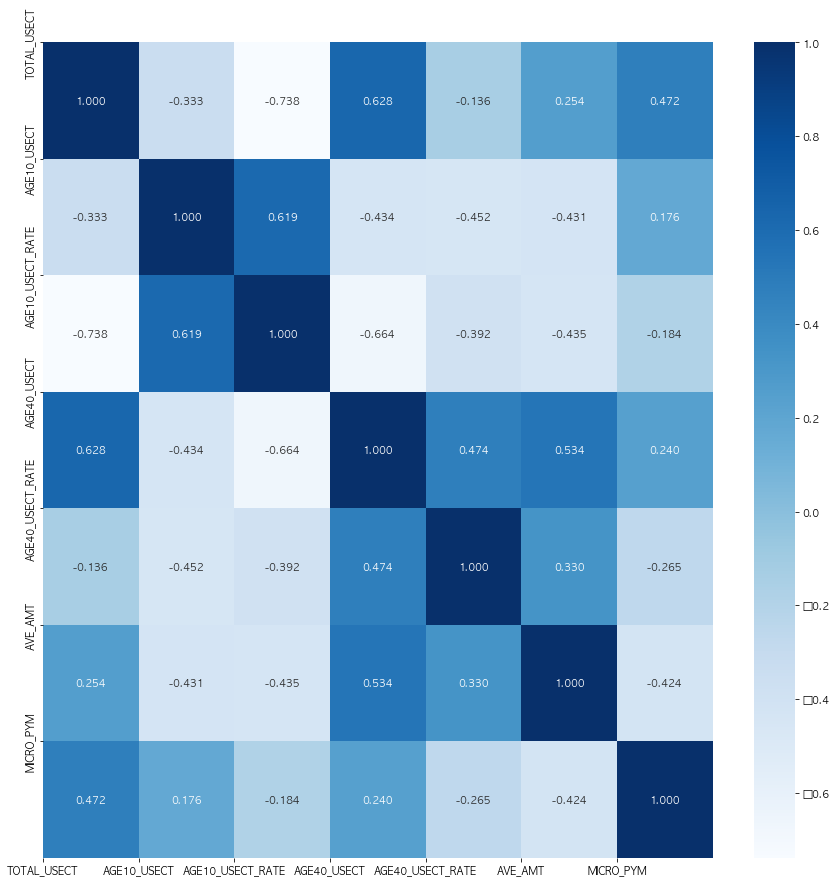

In [157]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

sns.heatmap(corr_data, fmt = '.3f', annot=True, cmap='Blues')
ticks = np.arange(0, 7, 1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_teenage_upjong.columns)
ax.set_yticklabels(df_teenage_upjong.columns)

plt.show()

### 결론

10대와 40대의 카드이용건수는 상관관계가 0.176, 0.240으로 매우 작게 나타남.  
10대와 40대의 상대적 비율 또한 상관관계가 있다고 보기 어려움.  

특정 연령층의 카드이용건수보다는 총 카드이용건수가 0.472로 비교적 높은 상관관계를 보임.  
건수당 평균카드이용금액도 -0.424로 약간의 음의 상관관계를 보이고 있음.

업종의 특성을 나타낼 수 있는 새로운 데이터가 추가된다면 강한 상관관계를 갖는 feature를 만들어낼 수 있을 것으로 기대.

## 2. 